In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split


from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

%matplotlib inline

In [59]:
car_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data', names = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"])


In [60]:
car_data.info() # number of items

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
buying      1728 non-null object
maint       1728 non-null object
doors       1728 non-null object
persons     1728 non-null object
lug_boot    1728 non-null object
safety      1728 non-null object
class       1728 non-null object
dtypes: object(7)
memory usage: 94.6+ KB


In [ ]:
# Data Set Characteristics:    Multivariate
# Number of Instances:   1728
# Attribute Characteristics: Categorical
# Number of Attributes: 6
# Associated Tasks:  Classification
# Missing Values:  No

In [112]:
class_data = car_data.groupby(['class'])
class_data.size()

class
acc       384
good       69
unacc    1210
vgood      65
dtype: int64

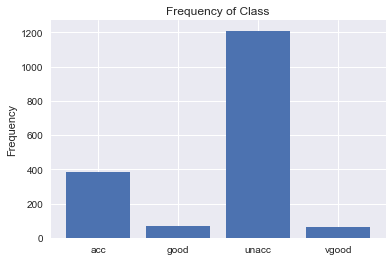

In [113]:
names = []
count = []
for name, group in class_data:
    names.append(name)
    count.append(len(group))

y_pos = np.arange(len(names))
plt.bar(y_pos, count, align = 'center')
plt.xticks(y_pos,names)
plt.ylabel('Frequency')
plt.title('Frequency of Class')

plt.show()

In [ ]:
# The above bar chart shows the frequency of the class output
#  It shows that out of the total 1728 cars in the dataset, 384(22.28 %) were acceptable, 
#  69 (4.05 %) were good, 1210 (69.85 %) were unacceptable, 
#  and 65 cars (3.82%) were very good. 

In [114]:
# Data Cleaning :conversion of nominal attributes to numeric attributes

In [126]:
# Step 1: Cleaning "Buying: buying" Attribute
# 'vhigh' : 4
# 'high': 3
# 'med': 2
# 'low': 1

# Step 2: Cleaning "Maintenance: maint" Attribute
# 'vhigh' : 4
# 'high': 3
# 'med': 2
# 'low': 1

# Step 3: Cleaning 'Luggage Boot: lug_boot' Attribute
# 'Big': 3
# 'Small' : 1

# Step 4: Cleaning 'Doors: doors' Attribute
# '5more': 6
# 'more': 5

# Step 5: Cleaning 'Class: class' Attribute
# 'vgood': 4
# 'good': 3
# 'acc': 2
# 'unacc': 1

In [115]:
df = car_data.replace('vhigh', 4)
df = df.replace('high',3)
df = df.replace('med', 2)
df = df.replace('low', 1)

df = df.replace('big', 3)
df = df.replace('small', 1)

df = df.replace('5more', 6)
df = df.replace('more', 5)

df = df.replace('vgood', 4)
df = df.replace('good',3)
df = df.replace('acc', 2)
df = df.replace('unacc', 1)

In [ ]:
# [TBC] Data Transformation 

In [124]:
# Data Split

In [ ]:
# Training and Testing % Split
# 90% : 10%
# 60% : 30%
# 50% : 50%
# 10 Folds

In [130]:
car = df.values
X,y = car[:,:6], car[:,6]
X,y = X.astype(int), y.astype(int)

In [163]:
# Classification: 1. Naive Bayesian 2. kNN 3. Support Vector Machines

In [216]:
models = {}

In [215]:
def addModel(models, name, acc):
    if name not in models:
        models[name] = [acc]
    else:
        models[name].append(acc)

In [ ]:
# 1. Naive Bayes
# Naive Bayes uses Bayes Theorem to model the conditional relationship of 
# each attribute to the class variable.

In [197]:
def GNB(X_train, y_train, X_test,y_test):
    # fit a Naive Bayes model to the data
    model = GaussianNB()
    model.fit(X_train, y_train)
    print(model)

    acc = predict(model, X_test, y_test)

    name = 'GaussianNB'
    addModel(models, name, acc)

In [ ]:
# 2. kNN

In [198]:
def kNN(X_train, y_train, X_test,y_test):
    # fit a Naive Bayes model to the data
    model = KNeighborsClassifier()
    model.fit(X_train, y_train)
    print(model)

    acc = predict(model, X_test, y_test)

    name = 'kNN'
    addModel(models, name, acc)

In [ ]:
# 3. Support Vector Machines (SVM)
# Support Vector Machines (SVM) are a method that uses points in a transformed problem space 
# that best separate classes into two groups. 

In [199]:
def svm(X_train, y_train, X_test,y_test):
    # fit a SVM model to the data
    model = SVC()
    model.fit(X_train, y_train)
    print(model)

    acc = predict(model, X_test, y_test)

    name = 'SVM'
    addModel(models, name, acc)

In [187]:
def split(test_percent):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_percent,random_state=0)
    GNB(X_train,  y_train, X_test,y_test)
    kNN(X_train,  y_train, X_test,y_test)
    svm(X_train,  y_train, X_test,y_test)

In [219]:
percent = [0.1, 0.3, 0.5]

In [217]:
for p in percent:
    split(p)
    

GaussianNB(priors=None)
             precision    recall  f1-score   support

          1       0.89      0.88      0.88       120
          2       0.40      0.19      0.26        42
          3       0.33      0.29      0.31         7
          4       0.14      1.00      0.24         4

avg / total       0.73      0.69      0.69       173

Confusion Matrix:
[[105  12   0   3]
 [ 12   8   4  18]
 [  1   0   2   4]
 [  0   0   0   4]]

Accuracy: 0.751445086705
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
             precision    recall  f1-score   support

          1       0.96      0.97      0.97       120
          2       0.89      0.81      0.85        42
          3       0.67      0.86      0.75         7
          4       0.75      0.75      0.75         4

avg / total       0.93      0.92      0.92       173

Confusion Matrix:
[[117   3   0   0]
 [  5  34   

In [ ]:
colors = list("rgbcmyk")

for data_dict in models.values():
   x = data_dict.keys()
   y = data_dict.values()
   plt.scatter(x,y,color=colors.pop())

plt.legend(d.keys())
plt.show()

In [218]:
models

{'GaussianNB': [0.75144508670520227, 0.75915221579961467, 0.75722543352601157],
 'SVM': [0.96146435452793833, 0.95183044315992293, 0.93448940269749514],
 'kNN': [0.96339113680154143, 0.93641618497109824, 0.91522157996146436]}

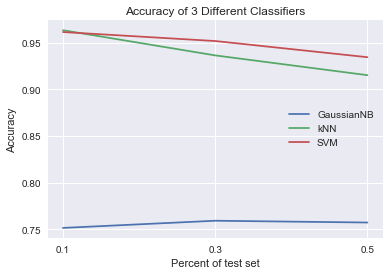

In [230]:
for key, data in models.items():
    plt.plot(percent, data, label = key)

plt.xlabel("Percent of test set")
plt.ylabel('Accuracy')
plt.title('Accuracy of 3 Different Classifiers')
plt.xticks(percent)
plt.legend()


In [ ]:
# The following part is just to visualize the result of WEKA 

In [232]:
test = {'GaussianNB': [0.836656, 0.833884, 0.857639],
 'SVM': [0.861093, 0.87686, 0.894676],
 'kNN': [0.788424, 0.858678, 0.9858796]}

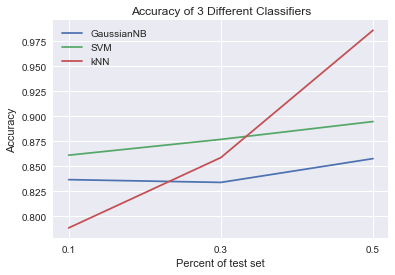

In [233]:
for key, data in test.items():
    plt.plot(percent, data, label = key)

plt.xlabel("Percent of test set")
plt.ylabel('Accuracy')
plt.title('Accuracy of 3 Different Classifiers')
plt.xticks(percent)
plt.legend()